# CALCULO DO RETORNO SIMPLES DE UM ÚNICO ATIVO

In [1]:
# RETORNO SIMPLES E RETORNO LOGARITMICO FORNECEM RESULTADOS DIFERENTES
#RECOMENDAÇÃ:
    #SIMPLES: Ao lidar com vários ativos ao longo do mesmo período de tempo
    #LOGARITMICO: Ao lidar com um único ativo ao longo do tempo
# OBS: lembrar o período para o qual calculamos a taxa de retorno(dia, mes, etc)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb

%matplotlib inline
sns.set_style('whitegrid')

In [3]:
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.215732
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,8.149876
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,8.034625
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,8.051086
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,8.018162


In [4]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-05,138.919998,136.270004,137.990005,138.699997,6856400.0,138.699997
2021-01-06,141.039993,138.600006,138.770004,140.160004,10578000.0,140.160004
2021-01-07,140.130005,138.039993,139.750000,138.850006,7355400.0,138.850006
2021-01-08,139.059998,137.000000,138.470001,138.789993,7447700.0,138.789993
2021-01-11,139.440002,137.929993,138.750000,138.445007,1523341.0,138.445007


***OBS: PARA LIDAR COM UM UNICO ATIVO, É MELHOR USAR RETORNO LOGARITMO (PROXIMA SESSÃO) FIZ COM SIMPLES POR FINS EDUCACIONAIS/EXPERIMENTAÇÃO***

In [5]:
# CRIANDO COLUNA PARA SALVAR A TAXA SIMPLES DE RETORNO:
PG['simple return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) -1

In [6]:
PG['simple return']

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004089
                ...   
2021-01-05    0.006385
2021-01-06    0.010526
2021-01-07   -0.009346
2021-01-08   -0.000432
2021-01-11   -0.002486
Name: simple return, Length: 6553, dtype: float64

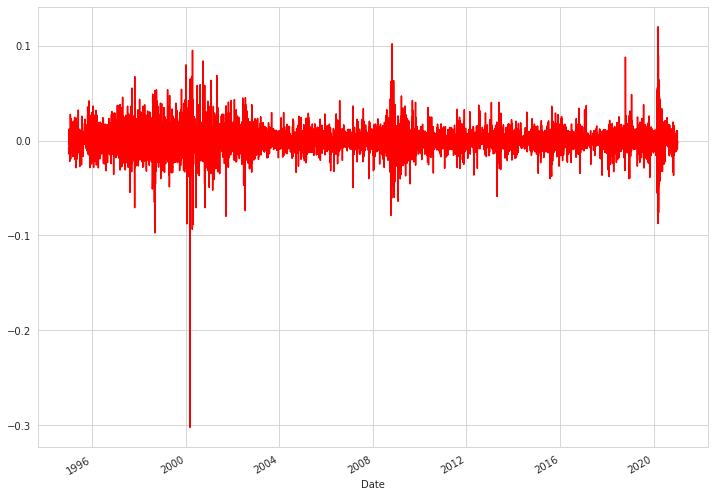

In [7]:
# SÉRIE TEMPORAL
PG['simple return'].plot(figsize=(12,9), color='red')

In [8]:
# CALCULO DA MEDIA DE RETORNO
media_dia_retorno = PG['simple return'].mean()

In [9]:
media_dia_retorno

0.0005335053378206256

In [10]:
# COMO NÃO HÁ NEGOCIAÇÃO TODOS OS DIAS, DEVEMOS RELEVAR FIM DE SEMANA E FERIADOS
# MEDIA DE CERCA DE 250 à 252 DIAS LETIVOS NO ANO 
media_dia_retorno = media_dia_retorno * 250

In [11]:
media_dia_retorno

0.1333763344551564

In [12]:
# FORMATAR O RESULTADO: 
print(str(round(media_dia_retorno, 5) * 100) + '%')

13.338%


# CALCULO DO RETORNO LOGARITMICO DE UM ÚNICO ATIVO ***(MAIS INDICADO PARA ESSE CASO)***

In [13]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close,simple return
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.215732,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,8.149876,-0.008016
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,8.034625,-0.014141
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,8.051086,0.002049
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,8.018162,-0.004089


In [14]:
# CRIANDO COLUNA PARA SALVAR A TAXA LOGARITMICA DE RETORNO:
# USANDO O np.log do Numpy
PG['log return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))

In [15]:
PG['log return'].head()

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004098
Name: log return, dtype: float64

In [16]:
PG['log return'].tail()

Date
2021-01-05    0.006365
2021-01-06    0.010471
2021-01-07   -0.009390
2021-01-08   -0.000432
2021-01-11   -0.002489
Name: log return, dtype: float64

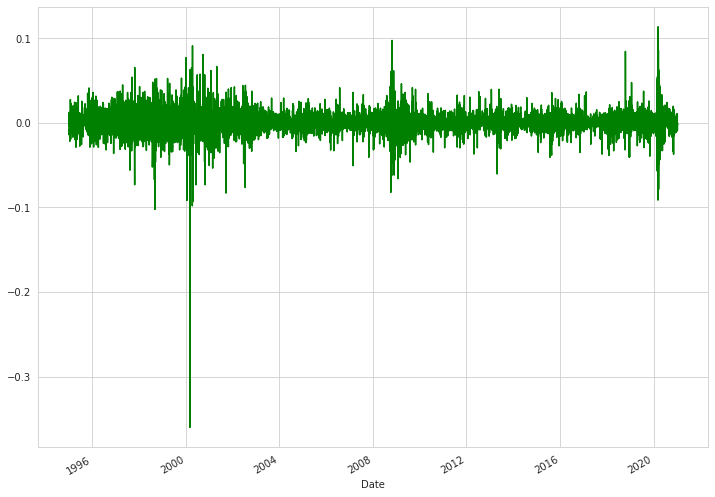

In [17]:
# SÉRIE TEMPORAL
PG['log return'].plot(figsize=(12,9), color='green')

In [18]:
# CALCULO DA MEDIA DE RETORNO, Já Multiplicas pelos dias letivos do ano:
media_retorno = PG['log return'].mean() *250

In [19]:
media_retorno

0.10776947424792598

In [20]:
# Multiplicas pelos dias do ano:
media_retorno = media_retorno

In [21]:
# FORMATAR O RESULTADO: 
print(str(round(media_retorno, 5) * 100) + '%')

10.777000000000001%
